In [1]:
# ignore warnings
import warnings
warnings.filterwarnings("ignore")

# data
import pandas as pd
import numpy as np
import ast
from numpy import mean

# visualization
import matplotlib.pyplot as plt

# chosen models
from xgboost import XGBRegressor

# data preprocessing
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# feature engineering
from xgboost import plot_importance

# model training selection
from sklearn.model_selection import train_test_split
# from sklearn.model_selection import RepeatedStratifiedKFold

## model evaluation metrics
from collections import Counter
# from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error as mse

In [2]:
df = pd.read_csv('../data/feature_engineering/combined_feng_final.csv', index_col=0)
df.shape

(2197, 4629)

### get all top features based on pca

In [3]:
with open('../nb_feng/high_var_org_col_index_final.txt', 'r') as reader:
    high_var_org_col_index = reader.read()

In [4]:
high_var_org_col_index = ast.literal_eval(high_var_org_col_index)

In [5]:
df1936 = df[df.columns[high_var_org_col_index]]

### split data

In [6]:
# get data
X = df1936
y = df['total_funding_amount_usd']

In [7]:
# split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

### scale numerical features 
*also scale output feature but note data leakage, split data first then standard scale it on train data, then also use same scaler to transform test data*

In [8]:
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)

## machine learning

In [9]:
xgb = XGBRegressor(objective='reg:squarederror', n_estimators=10, seed=123)

In [10]:
xgb.fit(X_train_scaled, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=10, n_jobs=12, num_parallel_tree=1, random_state=123,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=123,
             subsample=1, tree_method='exact', validate_parameters=1,
             verbosity=None)

In [11]:
X_test_scaled = scaler.transform(X_test)

In [12]:
pred = xgb.predict(X_test_scaled)

In [13]:
rmse = np.sqrt(mse(y_test, pred))
rmse

1046856.4855174592

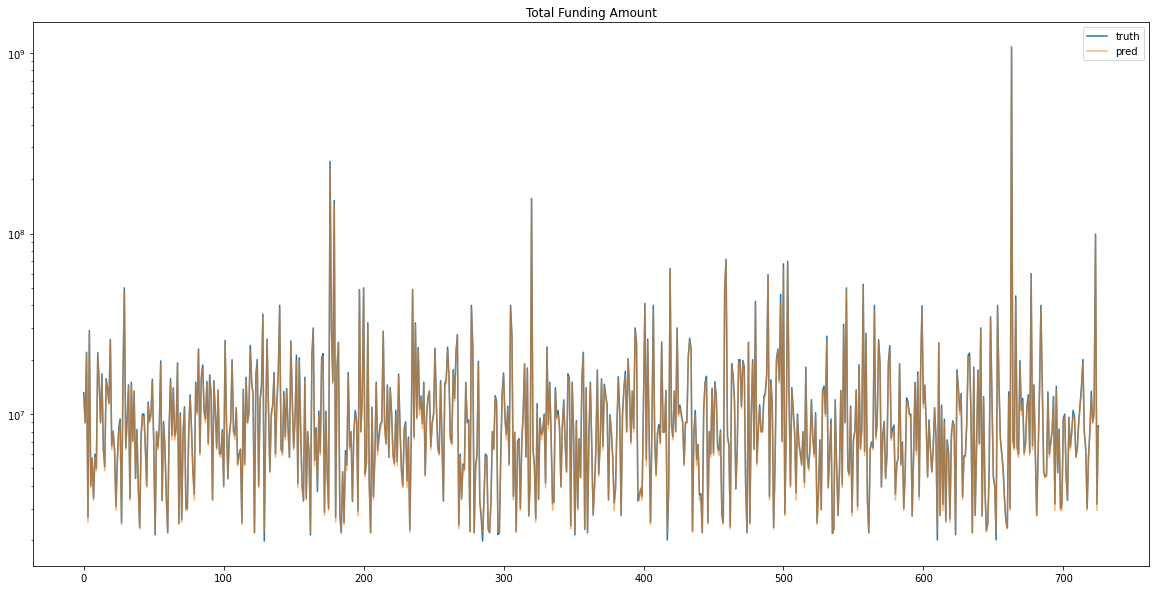

In [15]:
x_ax = range(len(y_test))
plt.figure(figsize=(20,10))
plt.plot(x_ax, y_test, label="truth")
plt.plot(x_ax, pred, label="pred", alpha=0.6)
plt.title("Total Funding Amount")
plt.yscale('log')
plt.legend()
plt.show()

the prediction looks okay, not sure why the rmse is so crazy high...